# Project On Students Performance

# Objective
To develop predictive models that analyze student performance based on demographics, academic behaviors, and scores, aiming to identify at-risk students and support equitable, data-driven interventions in education.


# Dataset Overview

This dataset contains information about students' demographic details, study habits, parental involvement, and academic performance.

- **Student ID**: Unique identifier (1001 to 3392).
  
#### Demographic Details:
- **Age**: Ranges from 15 to 18 years.
- **Gender**:
  - 0: Male
  - 1: Female
- **Ethnicity**:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- **Parental Education**:
  - 0: None
  - 1: High School
  - 2: Some College
  - 3: Bachelor's
  - 4: Higher

#### Study Habits:
- **StudyTimeWeekly**: 0 to 20 hours.
- **Absences**: 0 to 30 days.

#### Parental Involvement:
- **Tutoring**:
  - 0: No
  - 1: Yes
- **Parental Support**:
  - 0: None
  - 1: Low
  - 2: Moderate
  - 3: High
  - 4: Very High

#### Extracurricular Activities:
- **Extracurricular**:
  - 0: No
  - 1: Yes
- **Sports, Music, Volunteering**: Similar binary coding.

#### Academic Performance:
- **GPA**: Scale from 2.0 to 4.0.

#### Target Variable:
- **GradeClass**: Based on GPA:
  - 0: 'A' (GPA >= 3.5)
  - 1: 'B' (3.0 <= GPA < 3.5)
  - 2: 'C' (2.5 <= GPA < 3.0)
  - 3: 'D' (2.0 <= GPA < 2.5)
  - 4: 'F' (GPA < 2.0)


**1. Import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler


**2. Load the dataset**

In [ ]:
from google.colab import files
uploaded = files.upload()
# Load the CSV file
data = pd.read_csv('Student_performance_data _.csv')

# Display the first few rows
print(data.head())

Saving Student_performance_data _.csv to Student_performance_data _.csv
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA 

# New Section

**3. Data exploration**

In [ ]:
#Check for missing values
print(data.isnull().sum())

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64


In [ ]:
#Summary Statitics
print(data.describe())

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

In [ ]:
#drop unnecessary columns
data.drop('StudentID',axis=1,inplace=True)

**4. Data preprocessing**

In [ ]:
#Encoding categorical features
# Assuming 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', and 'GradeClass' are categorical
le = LabelEncoder()
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [ ]:
#Handling outliers
# Identifying outliers using Z-scores
from scipy import stats

z_scores = np.abs(stats.zscore(data[['StudyTimeWeekly', 'Absences', 'GPA']]))
outliers = np.where(z_scores > 3)  # Z-score > 3 considered an outlier
print(outliers)

(array([], dtype=int64), array([], dtype=int64))


1.Histogram for study time weekly


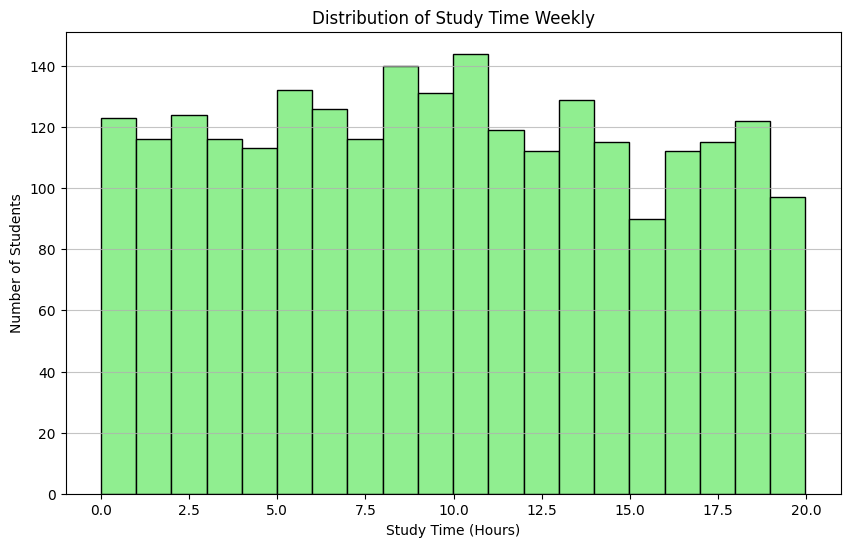

In [ ]:
# Create a histogram for Study Time Weekly - Meghana
plt.figure(figsize=(10, 6))
plt.hist(data['StudyTimeWeekly'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Study Time Weekly')
plt.xlabel('Study Time (Hours)')
plt.ylabel('Number of Students')
plt.grid(axis='y', alpha=0.75)
plt.show()


2. Averge GPA by parental support

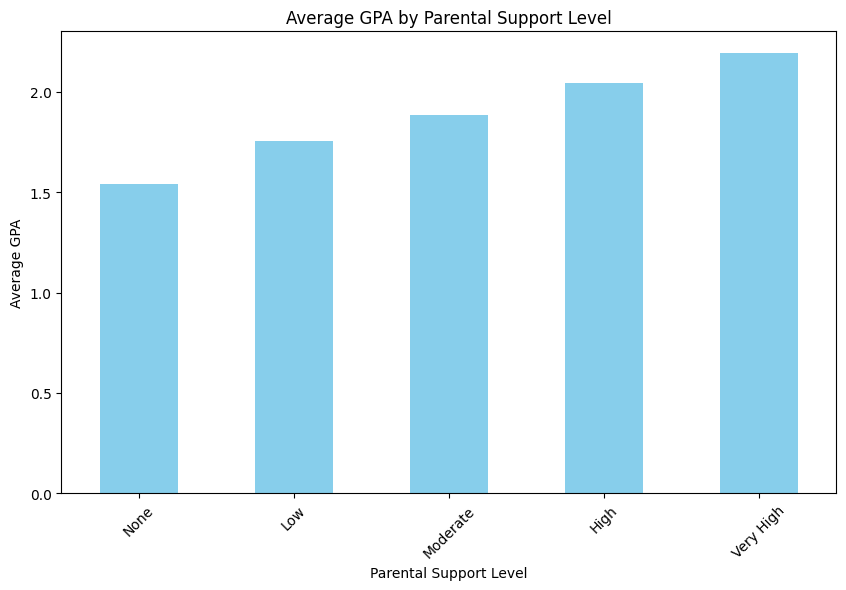

In [ ]:
# Calculate average GPA by Parental Support - Meghana
avg_gpa_by_support = data.groupby('ParentalSupport')['GPA'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
avg_gpa_by_support.plot(kind='bar', color='skyblue')
plt.title('Average GPA by Parental Support Level')
plt.xlabel('Parental Support Level')
plt.ylabel('Average GPA')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['None', 'Low', 'Moderate', 'High', 'Very High'], rotation=45)
plt.show()


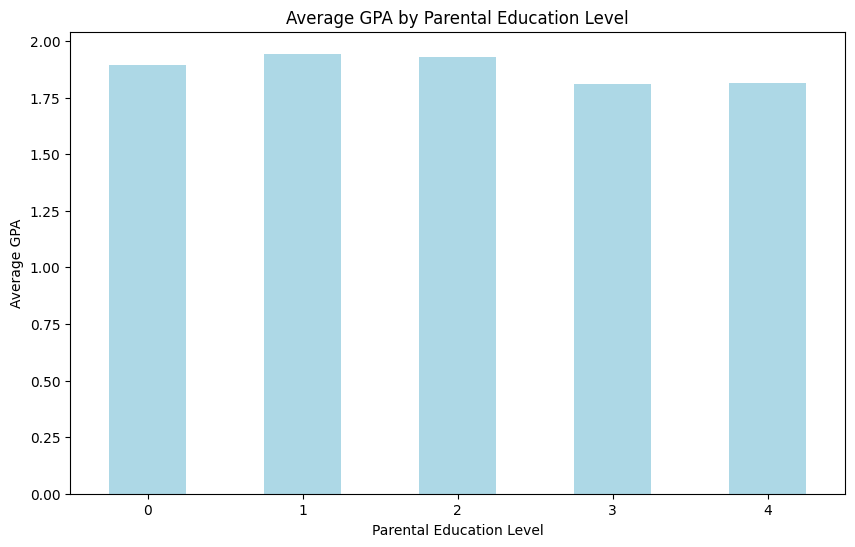

In [ ]:
# Plot: Average GPA by Parental Education Level--Shaheen
plt.figure(figsize=(10, 6))
avg_gpa_by_education = data.groupby('ParentalEducation')['GPA'].mean()
avg_gpa_by_education.plot(kind='bar', color='lightblue')
plt.title('Average GPA by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average GPA')
plt.xticks(rotation=0)
plt.show()

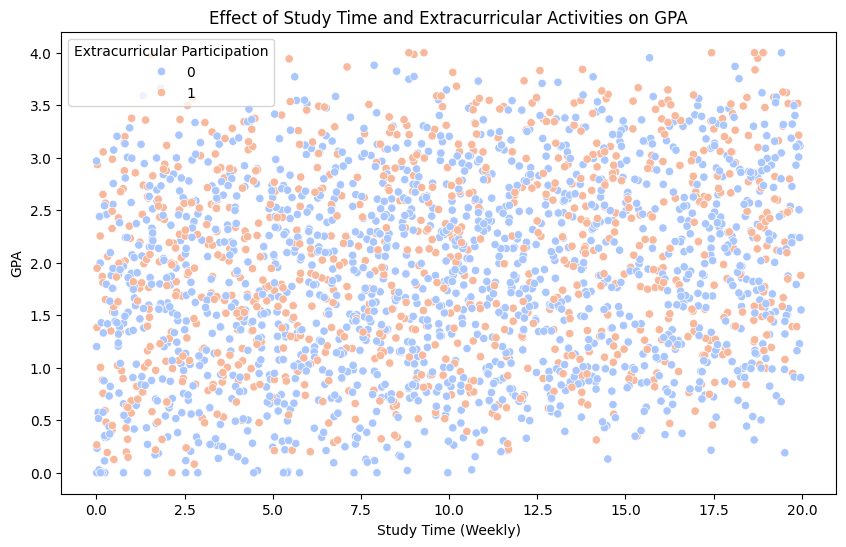

In [ ]:
import seaborn as sns

# Plot: Effect of Study Time and Extracurricular Activities on GPA--Shaheen
plt.figure(figsize=(10, 6))
sns.scatterplot(x='StudyTimeWeekly', y='GPA', hue='Extracurricular', data=data, palette='coolwarm')
plt.title('Effect of Study Time and Extracurricular Activities on GPA')
plt.xlabel('Study Time (Weekly)')
plt.ylabel('GPA')
plt.legend(title='Extracurricular Participation', loc='upper left')
plt.show()

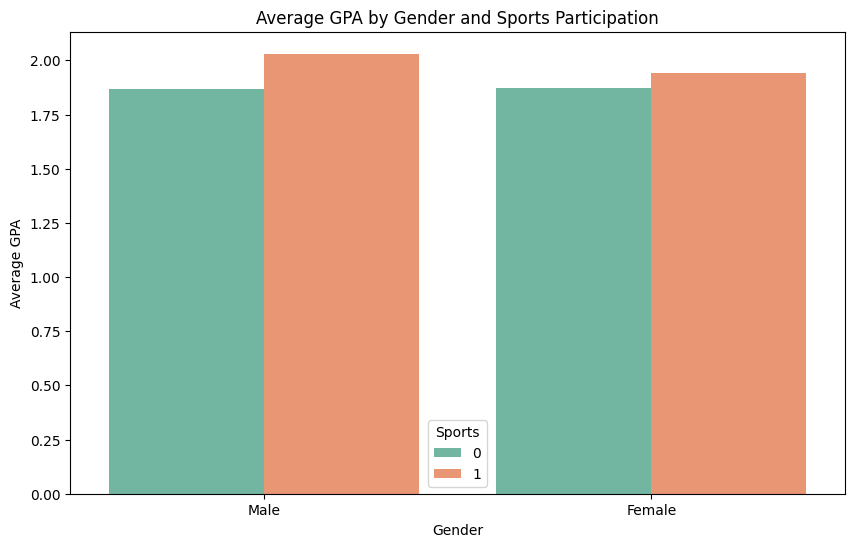

In [ ]:
# Plot: Average GPA by Gender and Sports Participation (Bar Plot)--Shaheen
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='GPA', hue='Sports', data=data, palette='Set2', errorbar=None)
plt.title('Average GPA by Gender and Sports Participation')
plt.xlabel('Gender')
plt.ylabel('Average GPA')
plt.xticks([0, 1], ['Male', 'Female'])
plt.show()

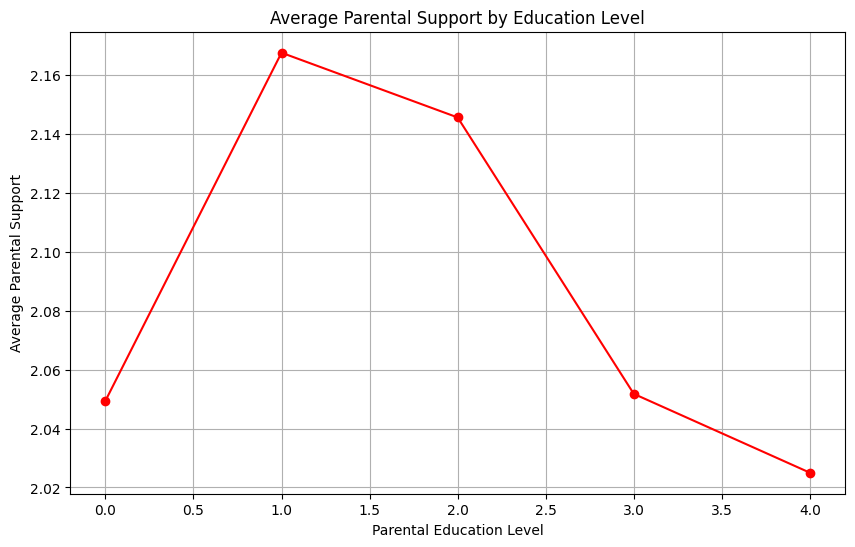

In [ ]:
#Average Parental Support by Education Level - Sashank
plt.figure(figsize=(10, 6))
avg_support = data.groupby('ParentalEducation')['ParentalSupport'].mean().reset_index()
plt.plot(avg_support['ParentalEducation'], avg_support['ParentalSupport'], marker='o', linestyle='-', color='r')
plt.title('Average Parental Support by Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Parental Support')
plt.grid(True)
plt.show()

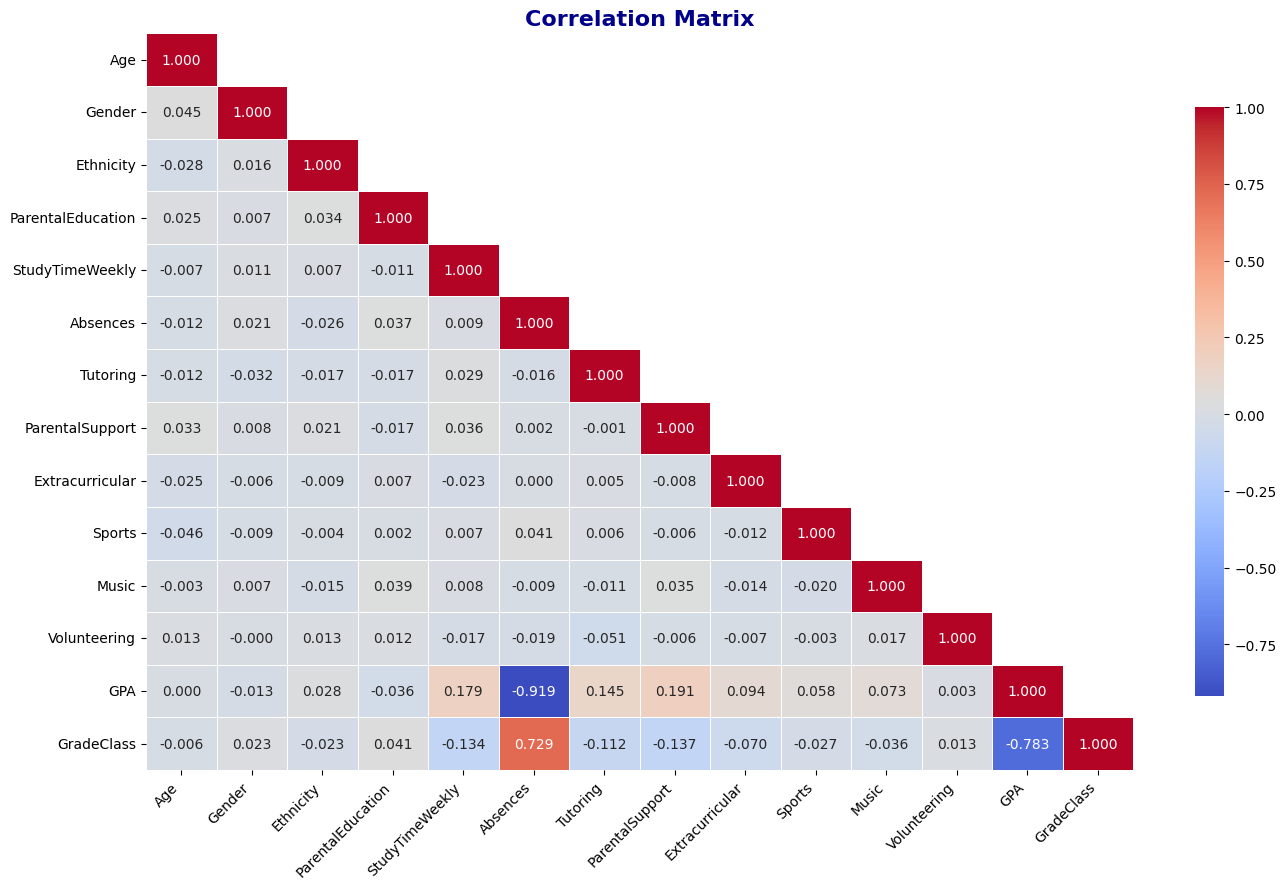

In [ ]:
# correlation matrix  - Sashank
corr = data.corr()
mask_ut = np.triu(np.ones(corr.shape), k=1).astype(bool)

plt.figure(figsize=(14,9))
sns.heatmap(
    corr,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    mask=mask_ut,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
)

plt.title("Correlation Matrix", fontsize=16, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

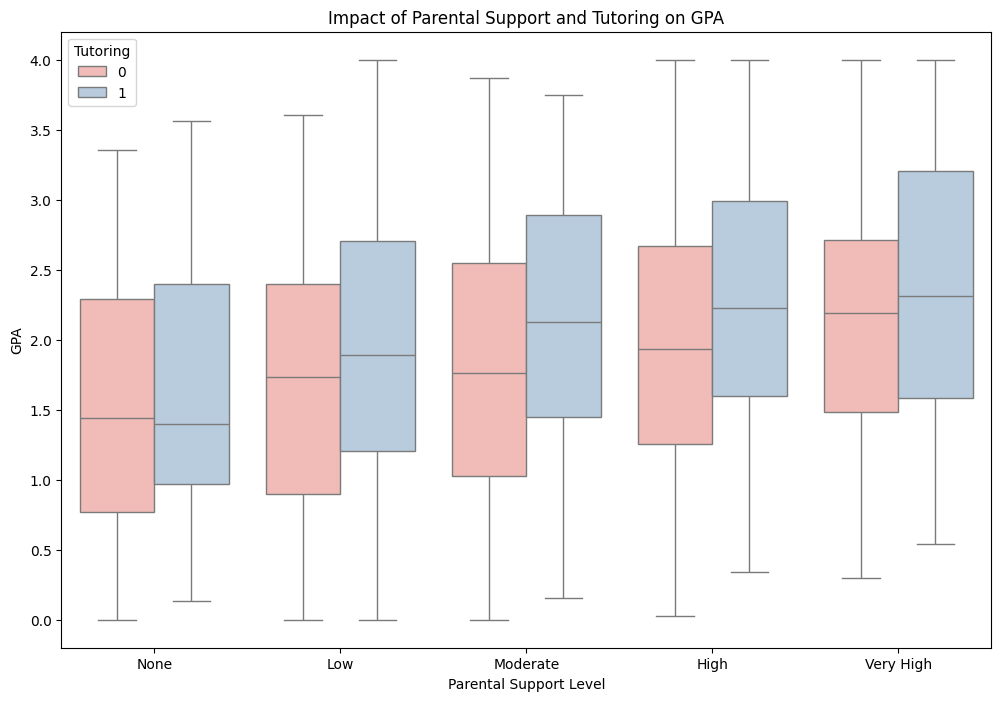

In [ ]:
#Impact of Parental Support and Tutoring on GPA - Deeya
plt.figure(figsize=(12, 8))
sns.boxplot(x='ParentalSupport', y='GPA', hue='Tutoring', data=data, palette='Pastel1')
plt.title('Impact of Parental Support and Tutoring on GPA')
plt.xlabel('Parental Support Level')
plt.ylabel('GPA')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['None', 'Low', 'Moderate', 'High', 'Very High'])
plt.legend(title='Tutoring', loc='upper left')
plt.show()


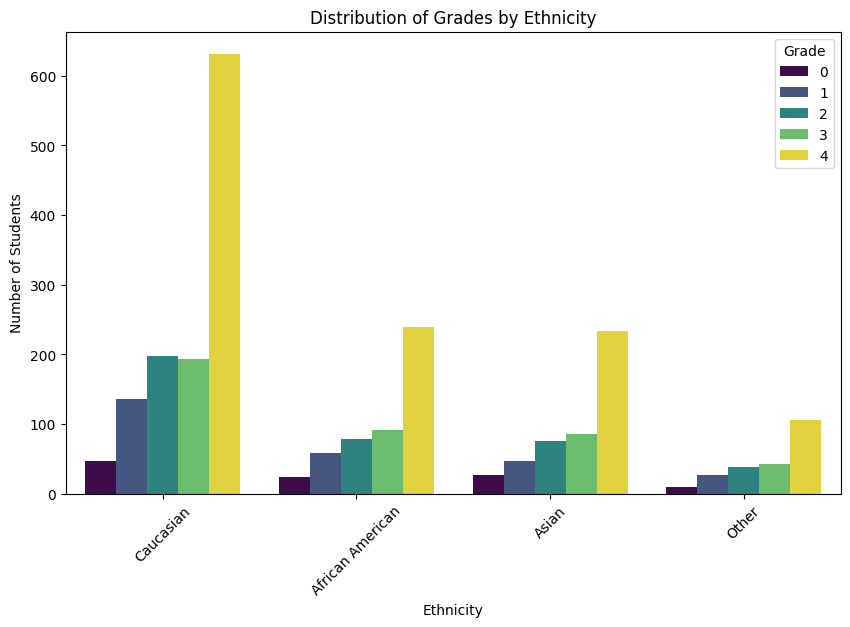

In [ ]:
#Distribution of Grades by Ethnicity - Deeya
plt.figure(figsize=(10, 6))
sns.countplot(x='Ethnicity', hue='GradeClass', data=data, palette='viridis')
plt.title('Distribution of Grades by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Number of Students')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Caucasian', 'African American', 'Asian', 'Other'], rotation=45)
plt.legend(title='Grade')
plt.show()


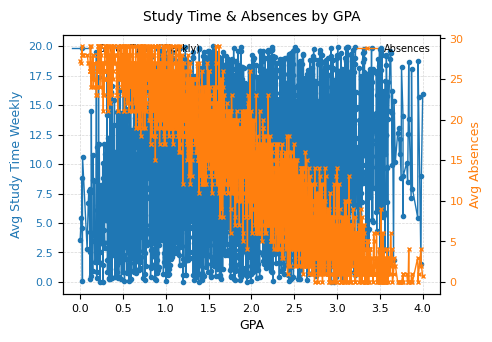

In [ ]:
#dual-axis line plot - Study Time & Absences by GPA  -Mera
import pandas as pd
import matplotlib.pyplot as plt

# Load the full dataset
df = pd.read_csv("Student_performance_data _.csv")

# Grouping data by GPA to calculate mean StudyTimeWeekly and Absences for each GPA level
gpa_grouped = df.groupby("GPA")[['StudyTimeWeekly', 'Absences']].mean().reset_index()

# Compact plot setup
fig, ax1 = plt.subplots(figsize=(5, 3.5), dpi=100)

# Plotting StudyTimeWeekly on the left y-axis
ax1.plot(gpa_grouped['GPA'], gpa_grouped['StudyTimeWeekly'], color="#1f77b4", marker="o", markersize=3, linewidth=1, label="Study Time (Weekly)")
ax1.set_xlabel("GPA", fontsize=9)
ax1.set_ylabel("Avg Study Time Weekly", color="#1f77b4", fontsize=9)
ax1.tick_params(axis="y", labelcolor="#1f77b4", labelsize=8)
ax1.tick_params(axis="x", labelsize=8)
ax1.legend(loc="upper left", fontsize=7, frameon=False)

# Plotting Absences on the right y-axis
ax2 = ax1.twinx()
ax2.plot(gpa_grouped['GPA'], gpa_grouped['Absences'], color="#ff7f0e", marker="x", markersize=3, linewidth=1, label="Absences")
ax2.set_ylabel("Avg Absences", color="#ff7f0e", fontsize=9)
ax2.tick_params(axis="y", labelcolor="#ff7f0e", labelsize=8)
ax2.legend(loc="upper right", fontsize=7, frameon=False)

# Title and grid styling
plt.title("Study Time & Absences by GPA", fontsize=10, pad=10)
fig.tight_layout(pad=1)
ax1.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.5)

# Show plot
plt.show()


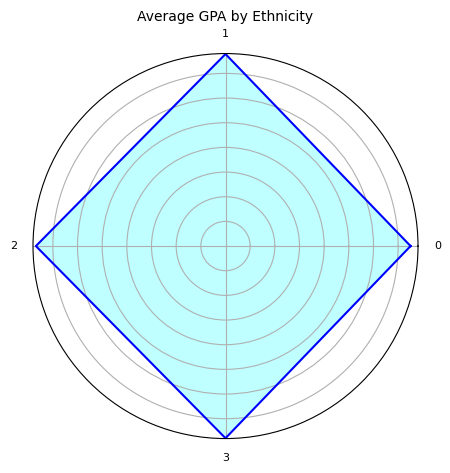

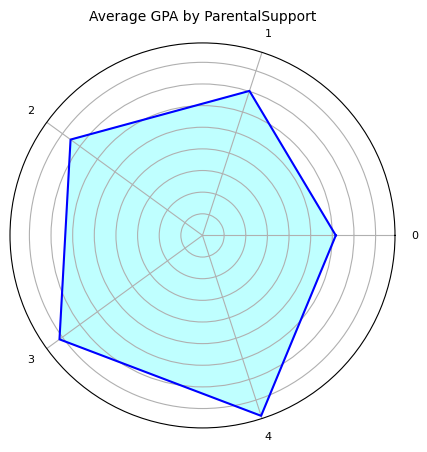

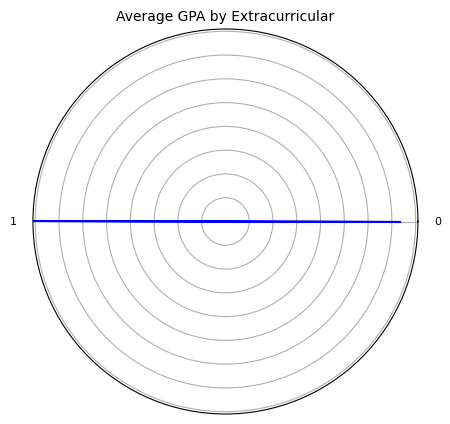

In [ ]:
# polar plot - GPA by Ethnicity, ParentalSupport, and Extracurricular activities - Mera
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the complete dataset
df = pd.read_csv('Student_performance_data _.csv')

def plot_polar_by_category(df, category_column, value_column='GPA'):
    # Aggregate GPA by the chosen categorical column
    gpa_by_category = df.groupby(category_column)[value_column].mean()

    # Extract categories and values
    categories = gpa_by_category.index
    values = gpa_by_category.values

    # Generate angles for each category
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

    # Close the loop for the circular plot by appending the first element
    values = np.append(values, values[0])
    angles += angles[:1]

    # Plot setup with smaller figure size
    fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='cyan', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=1.5)

    # Category labels with smaller font size
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=8)
    ax.set_yticklabels([])

    # Smaller title for compact display
    plt.title(f"Average GPA by {category_column}", fontsize=10)
    plt.show()

# Example usage to plot GPA by Ethnicity, ParentalSupport, and Extracurricular activities
for category in ['Ethnicity', 'ParentalSupport', 'Extracurricular']:
    plot_polar_by_category(df, category)


#Model Training - Decision Tree

In [ ]:
#Deeya - Decision Tree pt. 1
#Train it
#Evaluate it with classification metrics (e.g. Precision, Recall, Accuracy, F1-Score, etc.)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from scipy import stats

#Define features and target
X = data.drop(columns=['GradeClass'])
y = data['GradeClass']

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

#Train the model
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

#Classification Metrics
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


              precision    recall  f1-score   support

           0       0.62      0.59      0.60        22
           1       0.64      0.84      0.73        49
           2       0.88      0.78      0.82        85
           3       0.82      0.79      0.80        86
           4       0.89      0.89      0.89       237

    accuracy                           0.83       479
   macro avg       0.77      0.78      0.77       479
weighted avg       0.84      0.83      0.83       479

Accuracy: 0.8329853862212944


In [ ]:
#Deeya Decision Tree pt. 2
#Fine tune using Grid Search
#Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

#Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

#Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [ ]:
#Deeya Decision Tree pt. 3
#Fine tune using Random Search
#Define the parameter distribution
param_dist = {
    'max_depth': np.random.randint(3, 10, 5),
    'min_samples_split': np.random.randint(2, 10, 5),
    'min_samples_leaf': np.random.randint(1, 5, 5)
}

#Random Search
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

#Get the best parameters
print(f"Best parameters: {random_search.best_params_}")


Best parameters: {'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 5}


In [ ]:
#Deeya Decision Tree pt. 4
#Fine tune using Manual hyper parameter tuning
#Manually tuning the parameters based on domain knowledge or previous results
#Paramters chosen: max_depth=5, min_samples_split=10, min_samples_leaf=2
#max_depth=5 - This limits the maximum depth of the tree. A shallow tree prevents overfitting by forcing the model to generalize more, while a deeper tree may overfit the data by capturing noise. Setting a lower max_depth can help avoid overfitting
#min_samples_split=10 - Sets the minimum number of samples required to split an internal node. Increasing min_samples_split helps to prevent the model from over fitting
#min_samples_leaf=2 - Sets the minimum number of samples that a leaf node must have.
tuned_model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=2, random_state=42)

#Train the tuned model
tuned_model.fit(X_train, y_train)

#Make predictions with the tuned model
y_pred_tuned = tuned_model.predict(X_test)

#Evaluate tuned model
print(classification_report(y_test, y_pred_tuned))
print(f"Accuracy: {accuracy_score(y_test, y_pred_tuned)}")


              precision    recall  f1-score   support

           0       0.88      0.64      0.74        22
           1       0.81      0.88      0.84        49
           2       0.93      0.87      0.90        85
           3       0.89      0.86      0.88        86
           4       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.89      0.84      0.86       479
weighted avg       0.91      0.91      0.91       479

Accuracy: 0.9123173277661796


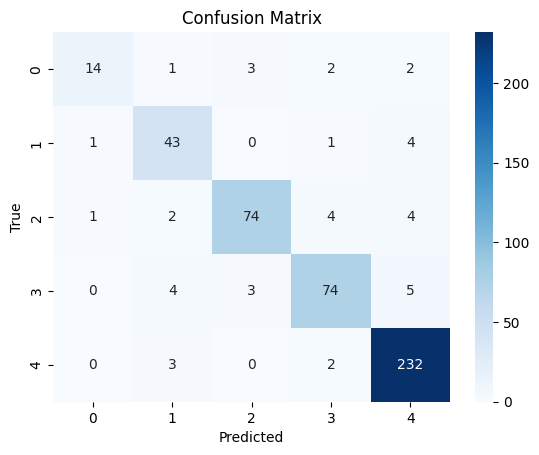

In [ ]:
#Deeya Decision Tree pt. 5
#Confusion Matrix for tuned model
cm = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


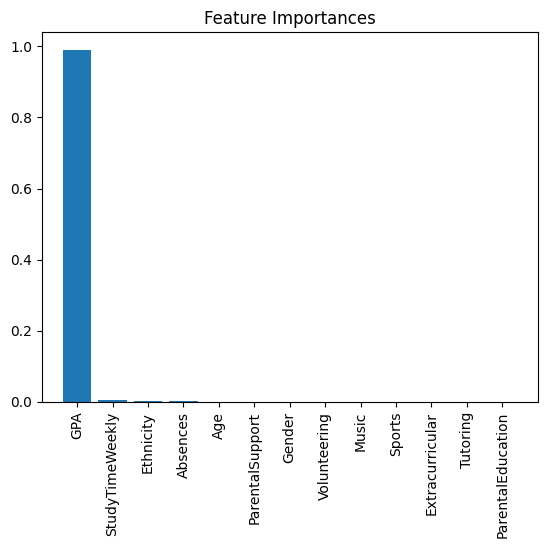

In [ ]:
#Deeya Decision Tree pt. 6
#Plot feature importances
importances = tuned_model.feature_importances_
indices = np.argsort(importances)[::-1]

#Plot the feature importances
plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


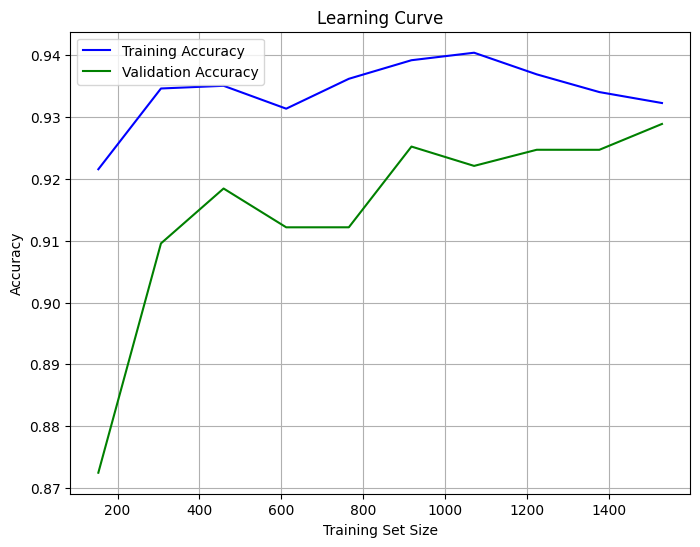

In [ ]:
#Deeya Decision Tree pt. 7
from sklearn.model_selection import learning_curve

#Generate a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    tuned_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

#Calculate the mean and standard deviation of training and testing scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

#Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, color='green', label='Validation Accuracy')

plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid(True)
plt.show()


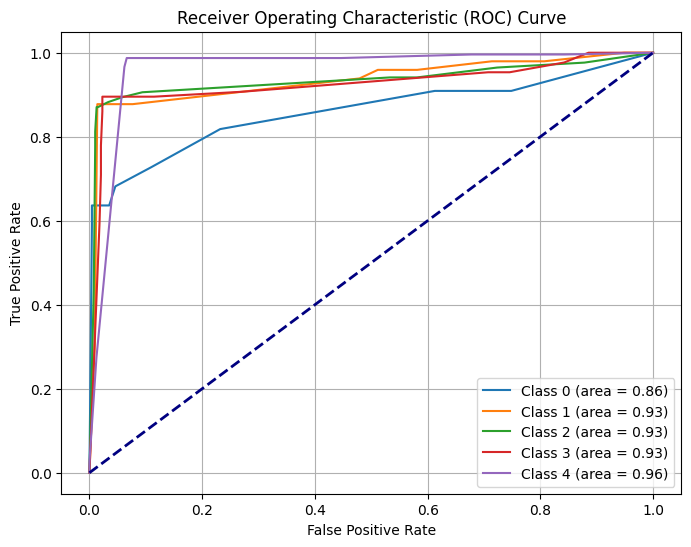

In [ ]:
#Deeya Decision Tree pt. 8
from sklearn.metrics import roc_curve, auc

#Get the predicted probabilities
y_pred_prob = tuned_model.predict_proba(X_test)

#Initialize the plot
plt.figure(figsize=(8, 6))

#Calculate and plot the ROC curve for each class
for i in range(len(tuned_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {tuned_model.classes_[i]} (area = {roc_auc:.2f})')

#Plot the diagonal line (chance level)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

#Plot formatting
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



#Model Training - Support Vector Classifier

Accuracy: 0.83
Precision: 0.84
Recall: 0.83
F1 Score: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       0.59      0.80      0.68        49
           2       0.81      0.74      0.77        85
           3       0.78      0.77      0.77        86
           4       0.91      0.96      0.94       237

    accuracy                           0.83       479
   macro avg       0.82      0.65      0.63       479
weighted avg       0.84      0.83      0.81       479



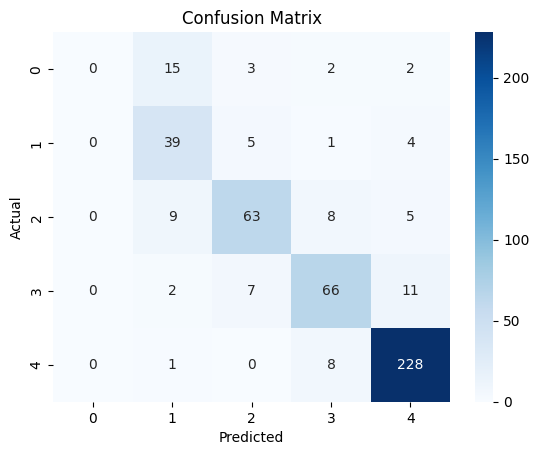

Best parameters from Grid Search: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
        C  gamma  kernel  accuracy
0     0.1  0.001  linear  0.801670
1     0.1  0.001     rbf  0.634656
2     0.1  0.010  linear  0.801670
3     0.1  0.010     rbf  0.672234
4     0.1  0.100  linear  0.801670
5     0.1  0.100     rbf  0.645094
6     0.1  1.000  linear  0.801670
7     0.1  1.000     rbf  0.494781
8     1.0  0.001  linear  0.826722
9     1.0  0.001     rbf  0.693111
10    1.0  0.010  linear  0.826722
11    1.0  0.010     rbf  0.730689
12    1.0  0.100  linear  0.826722
13    1.0  0.100     rbf  0.707724
14    1.0  1.000  linear  0.826722
15    1.0  1.000     rbf  0.496868
16   10.0  0.001  linear  0.828810
17   10.0  0.001     rbf  0.747390
18   10.0  0.010  linear  0.828810
19   10.0  0.010     rbf  0.793319
20   10.0  0.100  linear  0.828810
21   10.0  0.100     rbf  0.693111
22   10.0  1.000  linear  0.828810
23   10.0  1.000     rbf  0.498956
24  100.0  0.001  linear  0.828810
25  100.

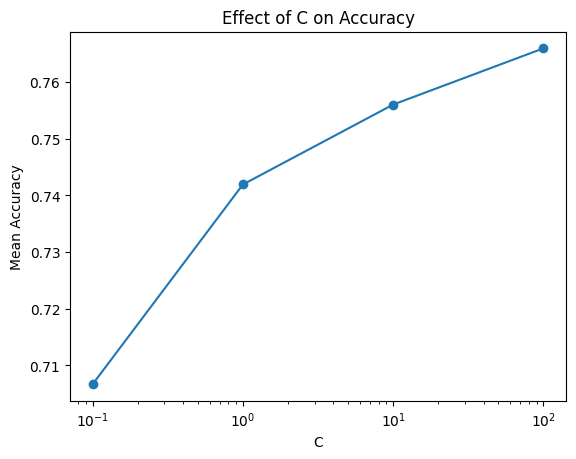

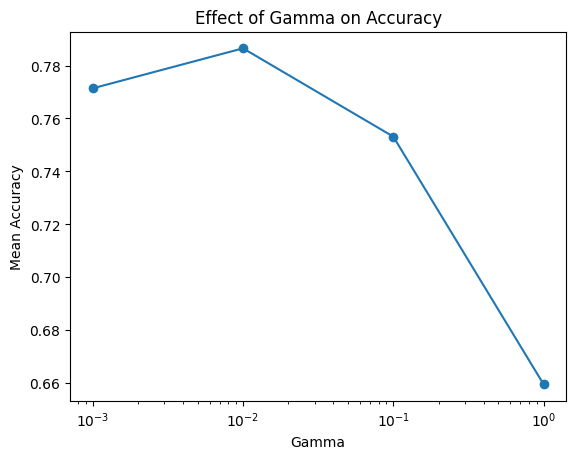

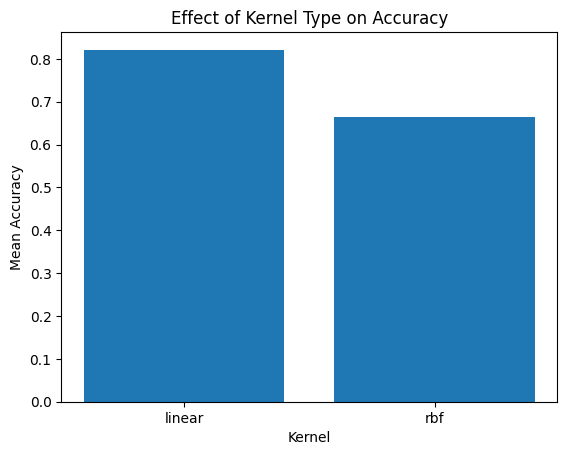

In [ ]:
# Required imports - Shaheen
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define target and features (using 'GradeClass' as the target variable)
X = data.drop('GradeClass', axis=1)  # Features
y = data['GradeClass']               # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Support Vector Classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluation using various classification metrics with zero_division=1 to handle undefined metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Grid Search for Hyperparameter Tuning
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'gamma': ['scale', 'auto'],    # Kernel coefficient
    'kernel': ['linear', 'rbf']    # Type of kernel function
}

grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)


# Testing specific values for C, gamma, and kernel manually
manual_results = []
C_values = [0.1, 1, 10, 100]
gamma_values = [0.001, 0.01, 0.1, 1]
kernel_types = ['linear', 'rbf']

for C in C_values:
    for gamma in gamma_values:
        for kernel in kernel_types:
            svm_model = SVC(C=C, gamma=gamma, kernel=kernel, random_state=42)
            svm_model.fit(X_train, y_train)
            accuracy = accuracy_score(y_test, svm_model.predict(X_test))
            manual_results.append((C, gamma, kernel, accuracy))

# Convert results to a DataFrame for easier visualization
manual_df = pd.DataFrame(manual_results, columns=['C', 'gamma', 'kernel', 'accuracy'])
print(manual_df)

# Plotting accuracy vs. C values
C_values = manual_df['C'].unique()
mean_accuracies = [manual_df[manual_df['C'] == c]['accuracy'].mean() for c in C_values]

plt.plot(C_values, mean_accuracies, marker='o')
plt.xlabel('C')
plt.ylabel('Mean Accuracy')
plt.title('Effect of C on Accuracy')
plt.xscale('log')
plt.show()

# Plotting accuracy vs. gamma values
gamma_values = manual_df['gamma'].unique()
mean_accuracies_gamma = [manual_df[manual_df['gamma'] == g]['accuracy'].mean() for g in gamma_values]

plt.plot(gamma_values, mean_accuracies_gamma, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Mean Accuracy')
plt.title('Effect of Gamma on Accuracy')
plt.xscale('log')
plt.show()

# Plotting accuracy by kernel type
kernel_types = manual_df['kernel'].unique()
mean_accuracies_kernel = [manual_df[manual_df['kernel'] == k]['accuracy'].mean() for k in kernel_types]

plt.bar(kernel_types, mean_accuracies_kernel)
plt.xlabel('Kernel')
plt.ylabel('Mean Accuracy')
plt.title('Effect of Kernel Type on Accuracy')
plt.show()


Model Training - Gradient Boosting Classifier

In [ ]:
#Meghana - Gradient Boosting Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()
# Load the CSV file
data = pd.read_csv('Student_performance_data _.csv')

# Display the first few rows
print(data.head())

# Inspect the data
print(data.head())
print(data.info())

Saving Student_performance_data _.csv to Student_performance_data _.csv
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA 

In [ ]:
#Meghana
# Define target and features
X = data.drop('GradeClass', axis=1)  # Drop target column 'GradeClass'
y = data['GradeClass']  # Target column



# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9206680584551148
Precision: 0.9234940267707389
Recall: 0.9206680584551148
F1 Score: 0.9210824799125418

Classification Report:
               precision    recall  f1-score   support

         0.0       0.67      0.64      0.65        22
         1.0       0.78      0.94      0.85        49
         2.0       0.94      0.87      0.90        85
         3.0       0.91      0.90      0.90        86
         4.0       0.98      0.97      0.97       237

    accuracy                           0.92       479
   macro avg       0.85      0.86      0.86       479
weighted avg       0.92      0.92      0.92       479



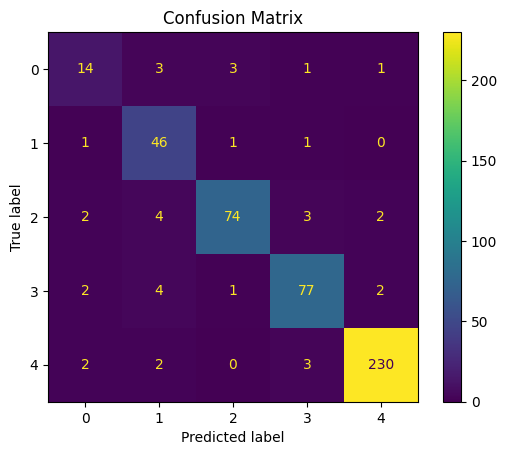

In [ ]:
#Meghana
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()


Best Parameters from Grid Search: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Best Parameters from Random Search: {'n_estimators': 80, 'max_depth': 9, 'learning_rate': 0.042222222222222223}

Manually Tuned Model Metrics:
Accuracy: 0.9248434237995825
Precision: 0.9283819430655479
Recall: 0.9248434237995825
F1 Score: 0.9253009249007009


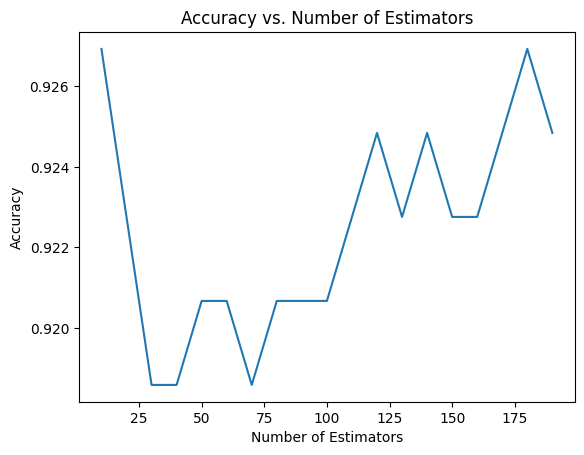

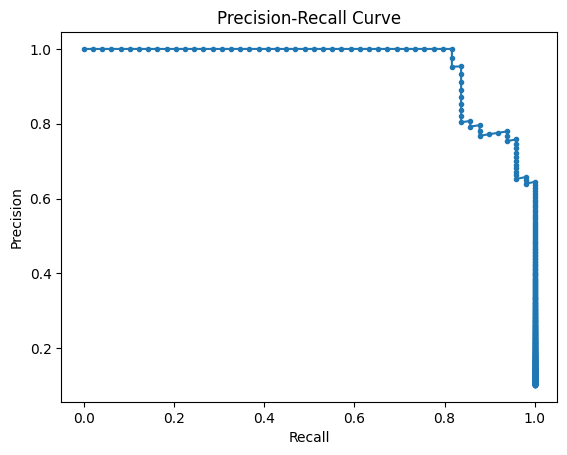

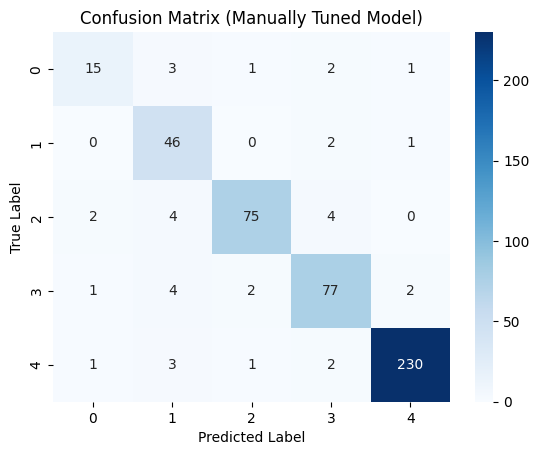

In [ ]:
#Meghana

# Fine-Tuning with Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:", grid_search.best_params_)

# Fine-Tuning with Random Search
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10, 1)
}

random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5, scoring='f1_weighted', random_state=42)
random_search.fit(X_train, y_train)

print("Best Parameters from Random Search:", random_search.best_params_)

# After observing the previous searches, I decided to try a lower learning rate to prevent overfitting,
# increase the number of estimators to give the model more learning capacity,
# and set a mid-range max_depth to balance complexity and generalization.

manual_model = GradientBoostingClassifier(
    n_estimators=150,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
manual_model.fit(X_train, y_train)

# Predictions and Evaluation for manually tuned model
y_pred_manual = manual_model.predict(X_test)
manual_accuracy = accuracy_score(y_test, y_pred_manual)
manual_precision = precision_score(y_test, y_pred_manual, average='weighted')
manual_recall = recall_score(y_test, y_pred_manual, average='weighted')
manual_f1 = f1_score(y_test, y_pred_manual, average='weighted')

print("\nManually Tuned Model Metrics:")
print("Accuracy:", manual_accuracy)
print("Precision:", manual_precision)
print("Recall:", manual_recall)
print("F1 Score:", manual_f1)

# Plotting Performance

# 1. Plotting Accuracy vs. Iterations (Estimators)
results = []
for n in range(10, 200, 10):
    temp_model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    temp_acc = accuracy_score(y_test, temp_pred)
    results.append(temp_acc)

plt.figure()
plt.plot(range(10, 200, 10), results)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Estimators')
plt.show()

# 2. Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
plt.figure()
plt.plot(recall_vals, precision_vals, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# 3. Confusion Matrix for the manually tuned model
manual_conf_matrix = confusion_matrix(y_test, y_pred_manual)
sns.heatmap(manual_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Manually Tuned Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


#Model Training - Random Forest Classifier

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63        22
           1       0.83      0.88      0.85        49
           2       0.94      0.87      0.90        85
           3       0.89      0.90      0.89        86
           4       0.94      0.98      0.96       237

    accuracy                           0.91       479
   macro avg       0.89      0.83      0.85       479
weighted avg       0.91      0.91      0.91       479



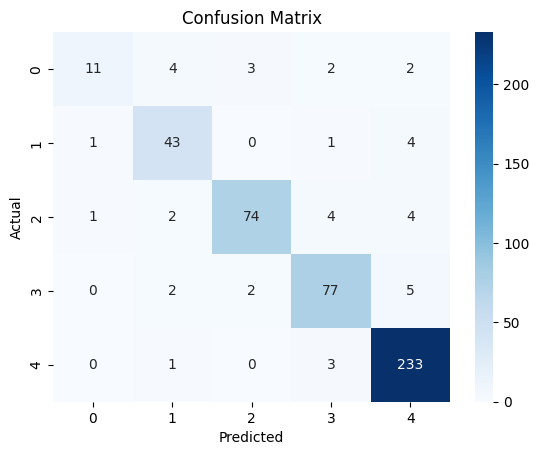

              Feature  Importance
12                GPA    0.480927
5            Absences    0.252374
4     StudyTimeWeekly    0.082518
7     ParentalSupport    0.032961
3   ParentalEducation    0.028093
0                 Age    0.027485
2           Ethnicity    0.023794
1              Gender    0.013798
8     Extracurricular    0.013473
9              Sports    0.013183
6            Tutoring    0.012896
10              Music    0.009595
11       Volunteering    0.008903
Best parameters from Grid Search: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


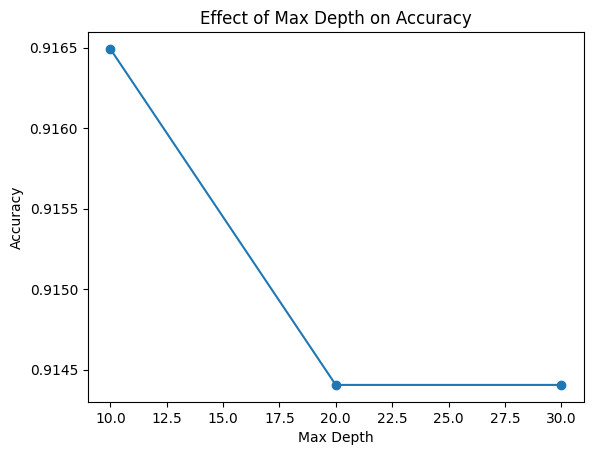

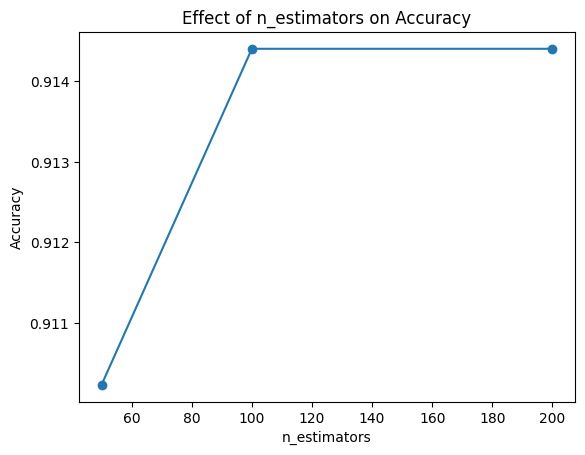

In [ ]:
#Random Forest - Mera
# Required imports
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define target and features - 'GradeClass' is the target)
X = data.drop('GradeClass', axis=1)  # Features
y = data['GradeClass']               # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training with Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Optional: Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)

# Hyperparameter Tuning
# Grid Search (Example)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters from Grid Search:", grid_search.best_params_)
#n_estimators: Controls the number of trees in the forest. Increasing this generally improves accuracy but also increases training time.
#max_depth: Limits the depth of each tree. Reducing it helps prevent overfitting, while increasing it allows more complex relationships to be captured.
#min_samples_split: Specifies the minimum number of samples required to split an internal node. Increasing this value can reduce overfitting by making trees more conservative.


# Plotting Performance (Example)
# Accuracy over varying max_depth (tuning visualization example)
results = []
for depth in param_grid['max_depth']:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    results.append((depth, acc))

depths, accuracies = zip(*results)
plt.plot(depths, accuracies, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Max Depth on Accuracy')
plt.show()

# Plotting Accuracy over varying n_estimators (tuning visualization example)
n_estimators_results = []
for n in param_grid['n_estimators']:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    acc = accuracy_score(y_test, rf.predict(X_test))
    n_estimators_results.append((n, acc))

# Unpack results for plotting
n_values, n_accuracies = zip(*n_estimators_results)
plt.plot(n_values, n_accuracies, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Effect of n_estimators on Accuracy')
plt.show()


#Model Training - Catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00


In [ ]:
#Sashank

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

y = data['GradeClass']
X = data.drop(['StudentID','GradeClass'], axis=1)

model = CatBoostClassifier(verbose=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.1, 0.01],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5]
}

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1-score: {grid_search.best_score_:.4f}")

# Use the best model found by GridSearchCV for prediction
best_model = grid_search.best_estimator_

# Predict using CatBoost Pool
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
print(f"Accuracy = {accuracy:.4f}, F1-score = {f1:.4f}")

# Print detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best parameters: {'depth': 3, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Best cross-validation F1-score: 0.9279
Accuracy = 0.9207, F1-score = 0.8673
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.59      0.70        22
         1.0       0.86      0.88      0.87        49
         2.0       0.94      0.88      0.91        85
         3.0       0.90      0.90      0.90        86
         4.0       0.94      0.98      0.96       237

    accuracy                           0.92       479
   macro avg       0.90      0.85      0.87       479
weighted avg       0.92      0.92      0.92       479



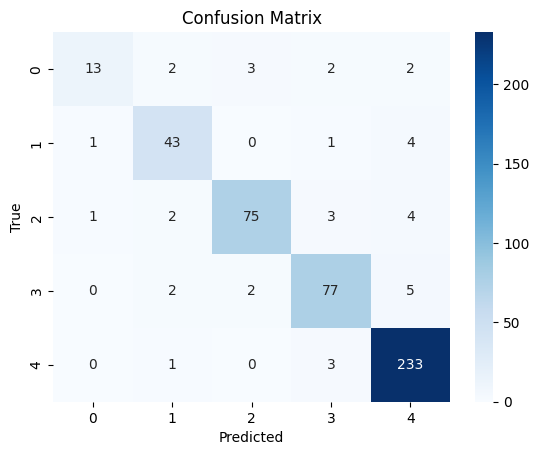

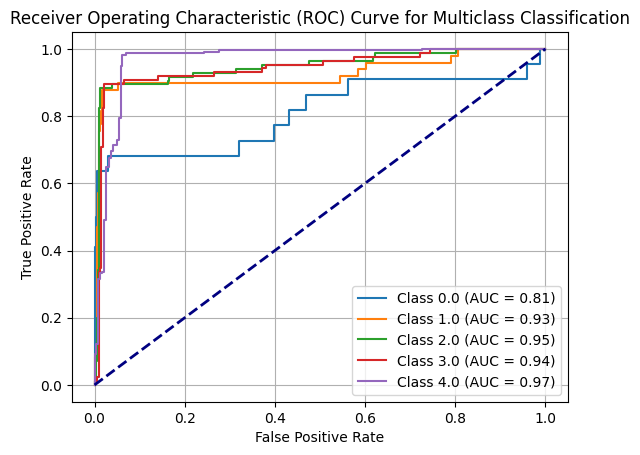

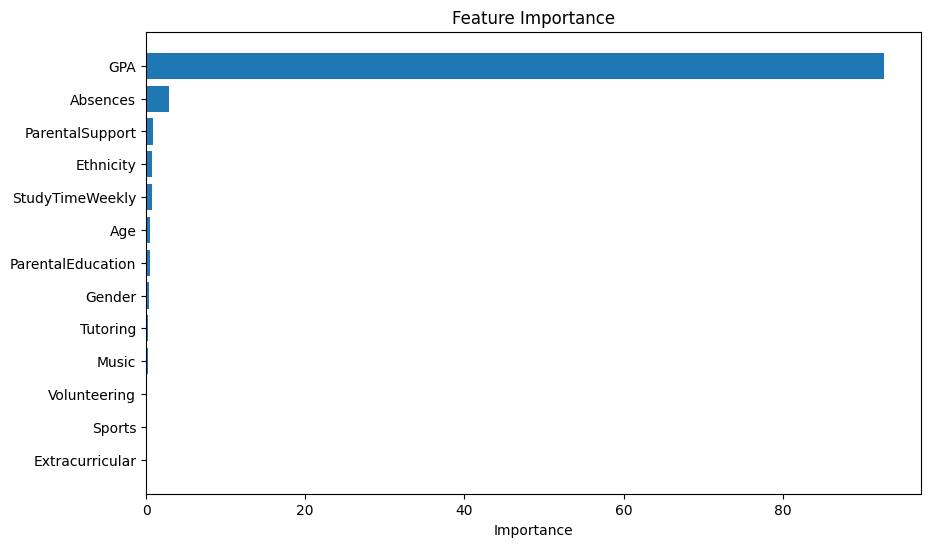

In [ ]:
#Sashank

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, roc_curve, auc


# Plot confusion matrix with the customized colormap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Get predicted probabilities for each class
y_prob = best_model.predict_proba(X_test)

for i in range(len(best_model.classes_)):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {best_model.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

feature_importances = best_model.get_feature_importance()

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(len(indices)), feature_importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # To display the most important features at the top
plt.show()


#**Conclusion**
After evaluating multiple models, Gradient Boosting emerged as the most reliable predictor with an accuracy of 0.92, a strong F1 score of 0.92, and consistent performance across various classes, as reflected in the classification report. The macro average F1 score of 0.86 and weighted average F1 score of 0.92 highlight its ability to balance precision and recall effectively, especially for higher-support classes. Compared to other models, Gradient Boosting provided robust precision and recall across most categories, making it well-suited for the task.

Supporting this choice:

Decision Tree had a slightly lower accuracy (91%) and a more variable recall for lower-support classes.
SVC showed lower recall in some classes, particularly with a significant dip for class 0.
Random Forest and CatBoost were competitive with around 91% and 92% accuracy, respectively, but Gradient Boosting still showed a marginal edge in overall metrics and stability across class distributions.
#**Insights**
From this analysis, several insights emerged:

Class Distribution and Model Sensitivity: Classes with higher support (e.g., class 4) generally showed better precision and recall. Models like Gradient Boosting and Random Forest performed well with these classes but struggled slightly with low-support classes.
Feature Impact: Features like 'StudyTimeWeekly','Parentalsupport' and 'Absences' significantly influenced predictions. Students with more absences or minimal study time showed lower performance, a pattern consistent across most models.
Model Behavior: Gradient Boosting’s approach of sequentially building on errors made it especially effective, as shown by higher scores across classes.
#**Future Work**
Improvements on Low-Support Classes: Models struggled to predict correctly for class 0, likely due to low sample size. Gathering more balanced data or implementing techniques like SMOTE could enhance performance here.
Parameter Tuning: The current parameter tuning could be further optimized, especially for models like SVC, which underperformed on certain metrics.
Feature Engineering: Exploring new features or engineering additional variables from existing ones (e.g., considering interaction terms) could refine model accuracy.
Model Ensemble: Combining the best-performing models (e.g., Gradient Boosting and CatBoost) in an ensemble may improve prediction stability across all classes.